In [2]:
import pandas as pd
import numpy as np

In [3]:
array = np.arange(0, 24000)
print(array)

[    0     1     2 ... 23997 23998 23999]


In [4]:
def matriz(num_colunas, array1):
        """
        Gera uma matriz sequencial a partir de um array, com o número de colunas especificado.

        Args:
            array (list ou np.ndarray): Array de entrada.
            num_colunas (int): Número de colunas desejado na matriz.

        Returns:
            np.ndarray: Matriz sequencial.
        """
        if num_colunas > len(array1):
            raise ValueError("O número de colunas não pode ser maior que o tamanho do array.")

        # Número de linhas na matriz
        num_linhas = len(array1) - num_colunas + 1

        # Criando a matriz sequencial
        matriz = np.array([array1[i:i + num_colunas] for i in range(num_linhas)])
        return matriz

In [5]:
matriz_array = matriz(120, array)
print(matriz_array)
matriz_array.shape

[[    0     1     2 ...   117   118   119]
 [    1     2     3 ...   118   119   120]
 [    2     3     4 ...   119   120   121]
 ...
 [23878 23879 23880 ... 23995 23996 23997]
 [23879 23880 23881 ... 23996 23997 23998]
 [23880 23881 23882 ... 23997 23998 23999]]


(23881, 120)

In [6]:
matriz_array = matriz(240, array)
print(matriz_array)
matriz_array.shape

[[    0     1     2 ...   237   238   239]
 [    1     2     3 ...   238   239   240]
 [    2     3     4 ...   239   240   241]
 ...
 [23758 23759 23760 ... 23995 23996 23997]
 [23759 23760 23761 ... 23996 23997 23998]
 [23760 23761 23762 ... 23997 23998 23999]]


(23761, 240)

In [7]:
matriz_array = matriz(480, array)
print(matriz_array)
matriz_array.shape

[[    0     1     2 ...   477   478   479]
 [    1     2     3 ...   478   479   480]
 [    2     3     4 ...   479   480   481]
 ...
 [23518 23519 23520 ... 23995 23996 23997]
 [23519 23520 23521 ... 23996 23997 23998]
 [23520 23521 23522 ... 23997 23998 23999]]


(23521, 480)

In [8]:
matriz_array = matriz(600, array)
print(matriz_array)
matriz_array.shape

[[    0     1     2 ...   597   598   599]
 [    1     2     3 ...   598   599   600]
 [    2     3     4 ...   599   600   601]
 ...
 [23398 23399 23400 ... 23995 23996 23997]
 [23399 23400 23401 ... 23996 23997 23998]
 [23400 23401 23402 ... 23997 23998 23999]]


(23401, 600)

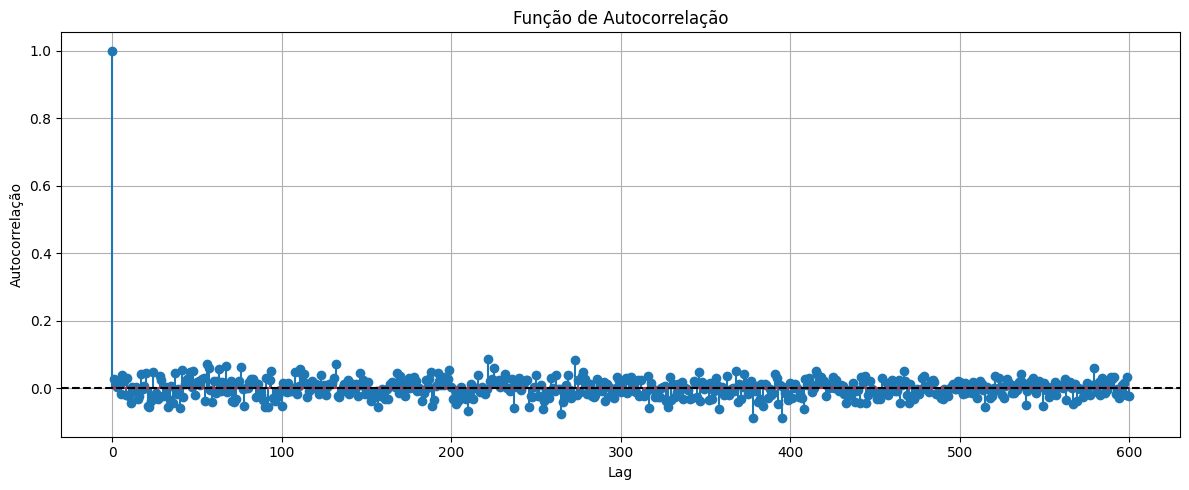

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation(sequencia, max_lag=60, titulo='Função de Autocorrelação'):
    """
    Plota a função de autocorrelação (ACF) de uma sequência numérica.

    Args:
        sequencia (list ou np.ndarray): Vetor 1D contendo os dados.
        max_lag (int): Número máximo de lags a considerar.
        titulo (str): Título do gráfico.
    """
    sequencia = np.asarray(sequencia)

    def autocorrelacao(seq, lag):
        n = len(seq)
        media = np.mean(seq)
        numerador = np.sum((seq[:n-lag] - media) * (seq[lag:] - media))
        denominador = np.sum((seq - media)**2)
        return numerador / denominador if denominador != 0 else 0

    acfs = [autocorrelacao(sequencia, lag) for lag in range(max_lag + 1)]

    plt.figure(figsize=(12, 5))
    plt.stem(range(max_lag + 1), acfs)  # removido use_line_collection
    plt.axhline(0, color='black', linestyle='--')
    plt.title(titulo)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelação')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
dados = np.random.rand(1000)
plot_autocorrelation(dados, max_lag=600)


In [15]:
data = pd.read_csv("/home/darkcover01/Documentos/Out/python_project/Atual/data_treino/Vitoria1_10 - 11-07-25_teste1.csv")
data.columns

/tmp/ipykernel_43952/46138772.py:1: DtypeWarning: Columns (5,135,136,138,141,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/darkcover01/Documentos/Out/python_project/Atual/data_treino/Vitoria1_10 - 11-07-25_teste1.csv")


Index(['100', '5', '5.1', '10', 'BET', 'Entrada', 'Odd', 'P60', 'P120', 'P180',
       ...
       'LOG(P(2);2)', 'Unnamed: 139', 'Unnamed: 140', 'Unnamed: 141',
       'Unnamed: 142', 'Unnamed: 143', 'Unnamed: 144', 'Unnamed: 145', 'PG',
       'PM'],
      dtype='object', length=148)

In [34]:
array = data['Entrada'][:1200]
array_ajustado = []
for name in array:
    trip = name.replace(',','.')
    array_ajustado.append(float(trip))

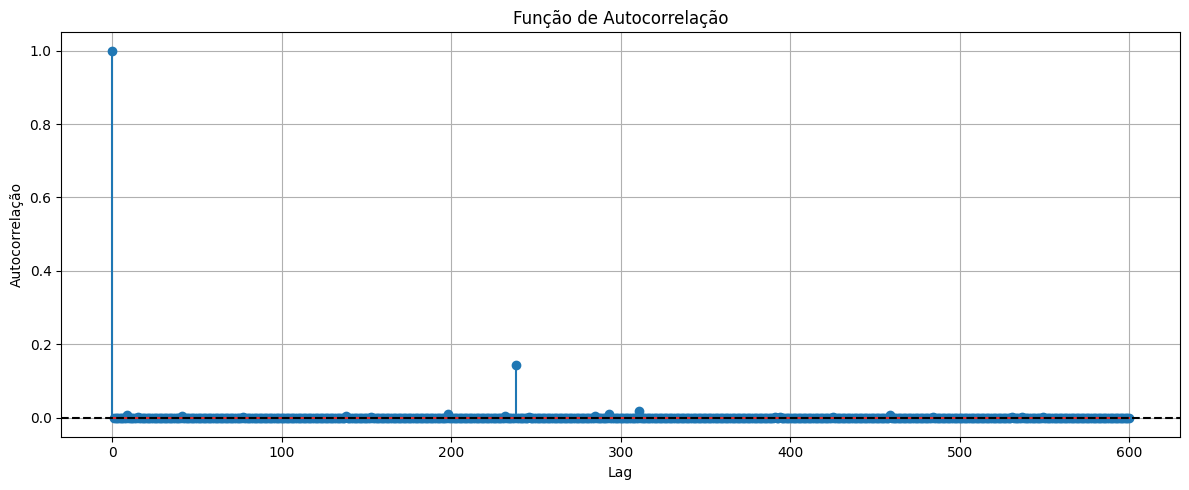

In [38]:
plot_autocorrelation(array_ajustado, max_lag=600)

In [61]:
array_binario = []
for name in array_ajustado:
    if name <= 1.01:
        trip = 1
    else:
        trip = 0
    array_binario.append(trip)

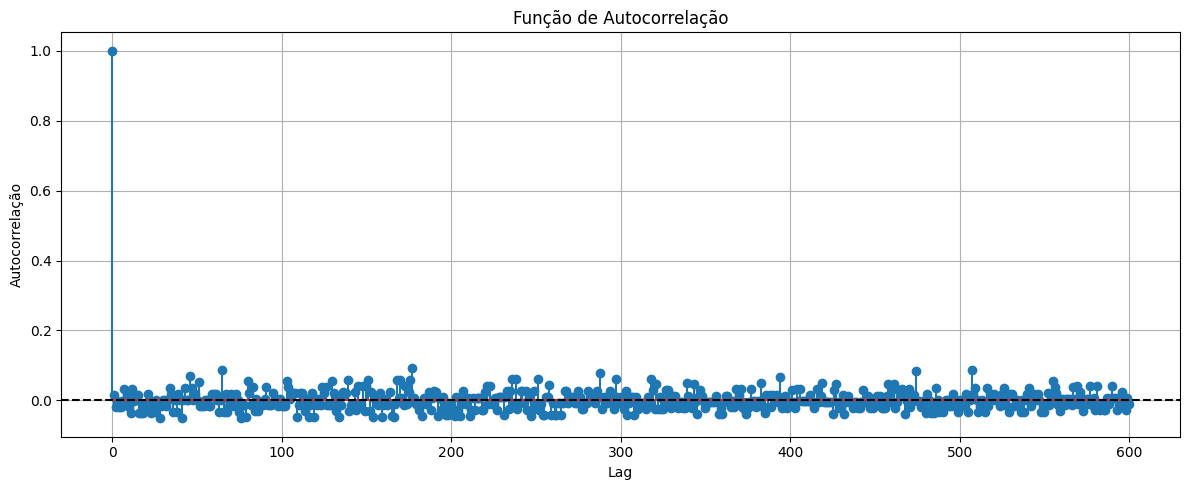

In [64]:
plot_autocorrelation(array_binario, max_lag=600)